#### Description
Context
This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data. 

Content
Dataset consists of following files:

Fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators



In [295]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [174]:
#importing the file
nyc_data=pd.read_csv("fundamentals.csv")


In [175]:
nyc_data.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [173]:
nyc_data.shape

(1781, 79)

In [176]:
prev_count=nyc_data.shape[0]
prev_count

1781

In [204]:
# descriptive statistics for the dataset
nyc_data.describe()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
count,1298.000000,1.298000e+03,1.298000e+03,1.298000e+03,1298.000000,1.298000e+03,1.298000e+03,1298.000000,1.298000e+03,1.298000e+03,...,1.298000e+03,1.298000e+03,1.298000e+03,1.298000e+03,1.298000e+03,1.298000e+03,1.298000e+03,1298.000000,1298.000000,1.298000e+03
mean,900.635593,3.710531e+09,-7.368665e+07,8.852459e+07,47.234977,-1.472310e+09,4.251111e+09,73.988444,1.821665e+09,-8.117347e+07,...,8.089506e+09,5.639947e+09,9.543752e+09,1.713823e+10,2.668199e+10,2.135834e+10,-4.402667e+09,2013.218028,3.315300,5.811242e+08
std,508.064204,7.465941e+09,5.306415e+08,7.586476e+08,249.985121,3.381998e+09,8.646564e+09,100.600927,3.073108e+09,4.219971e+08,...,1.448385e+10,1.002160e+10,1.825486e+10,2.845437e+10,4.363156e+10,4.491008e+10,1.606481e+10,22.202497,5.015762,9.969467e+08
min,0.000000,7.199000e+07,-6.452000e+09,-4.577000e+09,0.000000,-3.798500e+10,-7.215000e+08,0.000000,2.100000e+04,-5.562000e+09,...,1.447860e+08,1.642480e+08,-1.324400e+10,2.320000e+08,1.103602e+09,5.804150e+08,-2.297340e+11,1215.000000,-61.200000,-1.513945e+09
25%,479.500000,6.333885e+08,-1.010000e+08,-3.450000e+06,11.000000,-1.400000e+09,3.531750e+08,16.000000,2.981808e+08,-7.212475e+07,...,1.813175e+09,1.085804e+09,2.078300e+09,3.310445e+09,6.164775e+09,4.123048e+09,-3.188750e+09,2013.000000,1.590000,1.440597e+08
50%,903.500000,1.386214e+09,-2.100950e+07,4.000000e+06,18.000000,-4.300435e+08,1.506500e+09,41.000000,8.282000e+08,-2.113000e+06,...,3.501200e+09,2.354100e+09,4.313288e+09,7.852600e+09,1.296900e+10,8.217044e+09,-3.383870e+08,2014.000000,2.790000,2.862667e+08
75%,1339.750000,3.262851e+09,1.715000e+07,3.790000e+07,28.000000,-1.563455e+08,5.047000e+09,89.000000,1.969750e+09,0.000000e+00,...,7.834525e+09,5.357250e+09,9.852425e+09,1.864800e+10,3.098450e+10,1.750038e+10,0.000000e+00,2015.000000,4.497500,5.576653e+08
max,1779.000000,6.067100e+10,4.692000e+09,1.416200e+10,5789.000000,0.000000e+00,9.110800e+10,1041.000000,5.352800e+10,2.658000e+09,...,1.396600e+11,8.233600e+10,1.743990e+11,2.800010e+11,4.026720e+11,4.856510e+11,0.000000e+00,2016.000000,50.090000,8.419048e+09


### Data Cleaning

###### Checking for missing values

In [178]:
nyc_data.dropna(inplace=True)
nyc_data.count()

Unnamed: 0                      1299
Ticker Symbol                   1299
Period Ending                   1299
Accounts Payable                1299
Accounts Receivable             1299
                                ... 
Total Revenue                   1299
Treasury Stock                  1299
For Year                        1299
Earnings Per Share              1299
Estimated Shares Outstanding    1299
Length: 79, dtype: int64

In [179]:
missing_count= prev_count-nyc_data.count()
missing_count

Unnamed: 0                      482
Ticker Symbol                   482
Period Ending                   482
Accounts Payable                482
Accounts Receivable             482
                               ... 
Total Revenue                   482
Treasury Stock                  482
For Year                        482
Earnings Per Share              482
Estimated Shares Outstanding    482
Length: 79, dtype: int64

In [278]:
#Dropping Duplicates
pd.set_option("display.max_columns",200)
pd.set_option("display.max_rows",200)
nyc_data.drop_duplicates()
nyc_data

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,Cost of Revenue,Current Ratio,Deferred Asset Charges,Deferred Liability Charges,Depreciation,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets,Interest Expense,Inventory,Investments,Liabilities,Long-Term Debt,Long-Term Investments,Minority Interest,Misc. Stocks,Net Borrowings,Net Cash Flow,Net Cash Flow-Operating,Net Cash Flows-Financing,Net Cash Flows-Investing,Net Income,Net Income Adjustments,Net Income Applicable to Common Shareholders,Net Income-Cont. Operations,Net Receivables,Non-Recurring Items,Operating Income,Operating Margin,Other Assets,Other Current Assets,Other Current Liabilities,Other Equity,Other Financing Activities,Other Investing Activities,Other Liabilities,Other Operating Activities,Other Operating Items,Pre-Tax Margin,Pre-Tax ROE,Profit Margin,Quick Ratio,Research and Development,Retained Earnings,Sale and Purchase of Stock,"Sales, General and Admin.",Short-Term Debt / Current Portion of Long-Term Debt,Short-Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,1.049900e+10,78.0,0.000000e+00,2.230000e+08,1.001000e+09,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08,632000000.0,5.800000e+08,3.060000e+08,4.730000e+08,7.116000e+09,0.0,0.0,0.0,-1.020000e+09,197000000.0,1.285000e+09,4.830000e+08,-1.571000e+09,-1.876000e+09,2.050000e+09,-1.876000e+09,-4.084000e+09,1.124000e+09,3.860000e+08,1.480000e+08,1.0,2.167000e+09,6.260000e+08,4.524000e+09,-2.980000e+09,1.509000e+09,1.100000e+07,1.514700e+10,-141000000.0,8.450000e+08,10.0,31.0,8.0,72.0,0.0,-9.462000e+09,0.000000e+00,1.297700e+10,1.419000e+09,3.412000e+09,2.351000e+10,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-3.670000e+08,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,1.101900e+10,104.0,0.000000e+00,9.350000e+08,1.020000e+09,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09,856000000.0,1.012000e+09,-1.181000e+09,-2.350000e+08,1.535300e+10,0.0,0.0,0.0,2.208000e+09,660000000.0,6.750000e+08,3.799000e+09,-3.814000e+09,-1.834000e+09,1.873000e+09,-1.834000e+09,-4.489000e+09,1.560000e+09,5.590000e+08,1.399000e+09,5.0,2.299000e+09,1.465000e+09,7.385000e+09,-2.032000e+09,1.711000e+09,4.810000e+08,1.491500e+10,-56000000.0,8.530000e+08,8.0,80.0,7.0,96.0,0.0,-1.129600e+10,0.000000e+00,1.291300e+10,1.446000e+09,8.111000e+09,4.227800e+10,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.000000e+00,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,1.562000e+10,88.0,0.000000e+00,8.290000e+08,1.342000e+09,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09,887000000.0,1.004000e+09,1.799000e+09,-1.026000e+09,1.604300e+10,0.0,0.0,0.0,1.700000e+08,-146000000.0,3.080000e+09,-3.150000e+08,-2.911000e+09,2.882000e+09,5.420000e+08,2.882000e+09,2.882000e+09,1.771000e+09,8.000000e+08,4.249000e+09,10.0,2.060000e+09,8.980000e+08,7.059000e+09,-4.559000e+09,8.170000e+08,6.010000e+08,1.092800e+10,-500000000.0,1.295000e+09,8.0,159.0,7.0,80.0,0.0,-8.562000e+09,-1.052000e+09,2.068600e+10,1.677000e+09,6

### Data Visualization

In [235]:
nyc_data.groupby("For Year", sort=False).mean()

,Unnamed: 0,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,...,Total Assets,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,Earnings Per Share,Estimated Shares Outstanding
For Year,,,,,,,,,,,,,,,,,,,,,
2012.0,941.569892,2.953347e+09,-4.411060e+07,1.189004e+08,60.107527,-1.703236e+09,4.885524e+09,56.016129,1.366877e+09,-5.780838e+07,...,2.561941e+10,5.920343e+09,4.511888e+09,9.367078e+09,1.619015e+10,2.555723e+10,1.895210e+10,-4.333711e+09,2.944731,5.700240e+08
2013.0,893.205797,3.729379e+09,-1.113233e+08,5.723319e+07,25.791304,-1.430402e+09,4.098079e+09,77.985507,1.942087e+09,-8.493757e+07,...,2.602948e+10,8.321142e+09,5.471095e+09,9.789163e+09,1.622329e+10,2.601245e+10,2.113809e+10,-4.040443e+09,3.595594,5.598990e+08
2014.0,888.600000,3.842348e+09,-9.838516e+07,1.341262e+08,63.466667,-1.539334e+09,4.177886e+09,71.301449,1.847257e+09,-8.726441e+07,...,2.708067e+10,8.414794e+09,5.812154e+09,9.604549e+09,1.745919e+10,2.706374e+10,2.175399e+10,-4.559898e+09,3.702957,5.805267e+08
2015.0,899.865103,3.715602e+09,-2.791277e+07,6.219802e+07,45.014663,-1.430630e+09,4.520317e+09,74.741935,1.808168e+09,-7.542891e+07,...,2.793666e+10,7.975863e+09,5.874536e+09,9.393397e+09,1.853026e+10,2.792366e+10,2.089918e+10,-4.990450e+09,2.808123,5.846563e+08
2016.0,893.275000,4.753098e+09,-6.373894e+07,6.981011e+07,49.550000,-1.021132e+09,2.639920e+09,107.587500,2.310877e+09,-1.184984e+08,...,2.542214e+10,1.122043e+10,7.223965e+09,9.369615e+09,1.605207e+10,2.542169e+10,2.832543e+10,-2.995743e+09,3.485750,6.881317e+08
1215.0,854.000000,7.432300e+09,-4.739000e+08,-2.390000e+07,23.000000,-1.611000e+08,1.404100e+09,20.000000,1.502900e+09,0.000000e+00,...,1.258510e+10,7.693100e+09,7.584300e+09,1.965500e+09,1.061960e+10,1.258510e+10,7.613800e+09,-7.100000e+07,1.110000,4.095495e+08


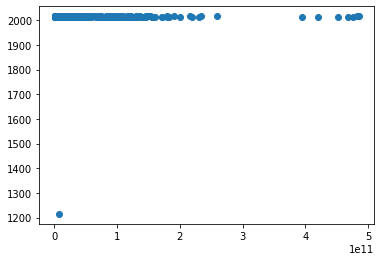

In [240]:

plt.scatter(nyc_data["Total Revenue"],nyc_data["For Year"])
plt.show()

In [253]:
nyc_data.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

In [312]:


lr=LinearRegression()
pred=lr.fit(X=nyc_data[[ 'Accounts Payable','Accounts Receivable',  'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'For Year',  'Estimated Shares Outstanding']], y= nyc_data['Earnings Per Share'])
pred

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [313]:
X=X=nyc_data[[ 'Accounts Payable','Accounts Receivable',  'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Operations', 'Net Receivables', 'Non-Recurring Items',
       'Operating Income', 'Operating Margin', 'Other Assets',
       'Other Current Assets', 'Other Current Liabilities', 'Other Equity',
       'Other Financing Activities', 'Other Investing Activities',
       'Other Liabilities', 'Other Operating Activities',
       'Other Operating Items', 'Pre-Tax Margin', 'Pre-Tax ROE',
       'Profit Margin', 'Quick Ratio', 'Research and Development',
       'Retained Earnings', 'Sale and Purchase of Stock',
       'Sales, General and Admin.',
       'Short-Term Debt / Current Portion of Long-Term Debt',
       'Short-Term Investments', 'Total Assets', 'Total Current Assets',
       'Total Current Liabilities', 'Total Equity', 'Total Liabilities',
       'Total Liabilities & Equity', 'Total Revenue', 'Treasury Stock',
       'For Year',  'Estimated Shares Outstanding']]
y= nyc_data['Earnings Per Share']

In [315]:
print("RSQ =",pred.score(X,y))

RSQ = 0.4591377939896045


In [276]:

    print("coefficients =", pred.coef_)
    
        

coefficients = [-2.45717830e-07  5.05358785e-10 -6.01523437e-04  2.37014224e-08
  1.17818395e-10  1.27255774e-02 -1.04275392e-09 -1.42329436e-10
  8.38365846e-11 -3.37951078e-09 -8.72960927e-04 -6.82698742e-09
 -1.05704879e-09 -6.57168375e-11 -1.19553584e-08  1.29603557e-08
 -1.77779425e-09  1.58388568e-10 -6.82929577e-09 -6.83662377e-09
  1.08370631e-02 -3.53902993e-09 -1.74941009e-09 -6.81155424e-09
  1.08101120e-08 -7.74946575e-10  2.38474079e-08  1.93014475e-10
 -1.19885486e-09 -6.97662361e-09 -1.29341550e-09 -5.75401834e-10
  8.26825714e-11 -6.06887339e-10  2.52163732e-10  5.61810359e-10
 -2.31574060e-08  6.28273524e-09  4.55204197e-10 -4.80780052e-09
 -1.01225989e-09 -7.36882919e-10 -2.65113496e-10  4.13273925e-10
 -7.21230260e-02 -6.80203146e-09 -7.95546142e-10 -2.45757838e-07
  1.26337634e-10 -2.33116180e-11  2.38104304e-08 -1.19423583e-09
  4.18830038e-10  1.84538454e-10  3.20868179e-02  4.12569005e-04
 -4.23380785e-03 -7.98893194e-03 -9.71053769e-11  8.58672135e-11
 -2.399111

In [279]:
print("intercept = ", pred.intercept_)

intercept =  -3.5219483310859463


In [281]:
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size =0.55)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(584, 74) (714, 74)
(584,) (714,)


In [341]:
lm=linear_model.LinearRegression()

model=lm.fit(X_train, y_train)
predictions=lm.predict(X_test)
model.score(X_test,y_test)

-1624467613853379.2

Text(0.5, 1.0, 'Actual Vs Predicted Values')

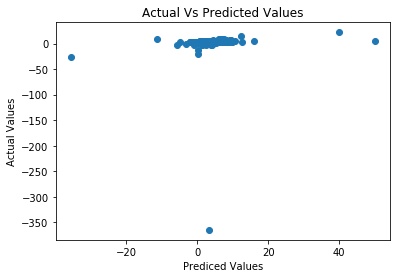

In [335]:
plt.scatter(y_test,predictions)
plt.xlabel("Prediced Values")
plt.ylabel("Actual Values")
plt.title("Actual Vs Predicted Values")